In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from concurrent.futures import ThreadPoolExecutor, as_completed
import dask.dataframe as dd
import sys

sys.path.append("../../scripts")
%aimport initial_map
%aimport map_refiner
%aimport complexity
%aimport finder
%aimport preprocess
%aimport complexity
    
import glob
from tqdm import tqdm  # progress bar

In [3]:
ADBC_reads_per_umi = pd.read_csv("../../output/TL4_umi_results/ADBC_reads_per_umi.csv")
ADBC_reads_per_umi

,Unnamed: 0,ADBC2,HawkBCs,UMI,reads,name
0,0,AAAAAA,AACTCCGTA,CGATGAAATCAC,1,a2_RNA_ADBC_S18
1,1,AAAAAA,ACTCCTGCA,GGTTAACGTAGA,1,a2_RNA_ADBC_S18
2,2,AAAAAA,ACTCGTGCA,TGAGAAATCAGT,1,a2_RNA_ADBC_S18
3,3,AAAAAA,ACTCTTGCA,AAAAACTAACTT,4,a2_RNA_ADBC_S18
4,4,AAAAAA,ACTCTTGCA,ACTCGAAACTTC,3,a2_RNA_ADBC_S18
...,...,...,...,...,...,...
4044714,516321,TTTTTT,AGAGGAGTT,TGCGAAATGGCA,1,a5_RNA_ADBC_S21
4044715,516322,TTTTTT,AGAGGAGTT,ACACTTTTTACT,1,a5_RNA_ADBC_S21
4044716,516323,TTTTTT,AGAGGAGTT,TATGAATCGGGA,1,a5_RNA_ADBC_S21
4044717,516324,TTTTTT,AGAGGCGTT,ACTCATGAAAAT,1,a5_RNA_ADBC_S21


<Axes: ylabel='Count'>

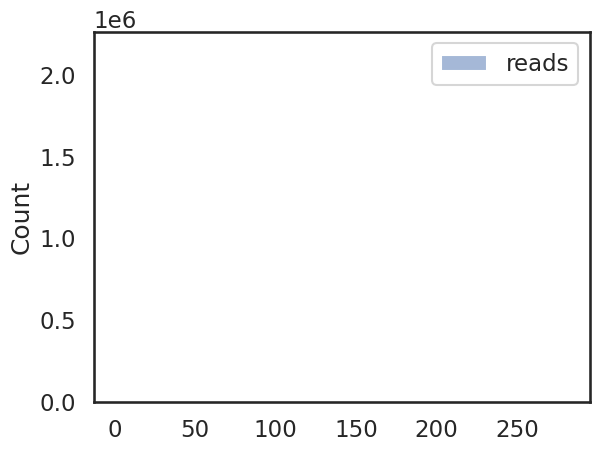

In [6]:
sns.histplot(ADBC_reads_per_umi[["UMI", "reads"]].groupby("UMI").sum())

In [ ]:
ADBC_reads_per_umi[["ADBC2",  "reads"]].groupby("ADBC2").sum()

In [4]:
RPTR_reads_per_umi = pd.read_csv("../../output/TL4_umi_results/RTBC_reads_per_umi.csv")
RPTR_reads_per_umi

,Unnamed: 0,RTBC,UMI,reads,name
0,0,AAAAAAAAAAAACGAT,CGAAATCAACTT,2,r2_RNA_RTBC_S26
1,1,AAAAAAAAAAAACGAT,CTCCCCATCACC,1,r2_RNA_RTBC_S26
2,2,AAAAAAAAAAAACGAT,CTATATACGTGA,1,r2_RNA_RTBC_S26
3,3,AAAAAAAAAAAACGAT,GCGTACGACTCA,1,r2_RNA_RTBC_S26
4,4,AAAAAAAAAAAACGAT,GACACAATTGCA,1,r2_RNA_RTBC_S26
...,...,...,...,...,...
4701808,1027833,TTTTTAGCCGTCATCT,CATCTCTAGGCT,1,r4_RNA_RTBC_S28
4701809,1027834,TTTTTGTACGAGTAGA,GCCGATTTTTGT,1,r4_RNA_RTBC_S28
4701810,1027835,TTTTTGTACGAGTAGA,AGATGTCCATAT,1,r4_RNA_RTBC_S28
4701811,1027836,TTTTTTGAATTTTTAT,TGGAAAAGTAAC,1,r4_RNA_RTBC_S28


<Axes: xlabel='name', ylabel='reads'>

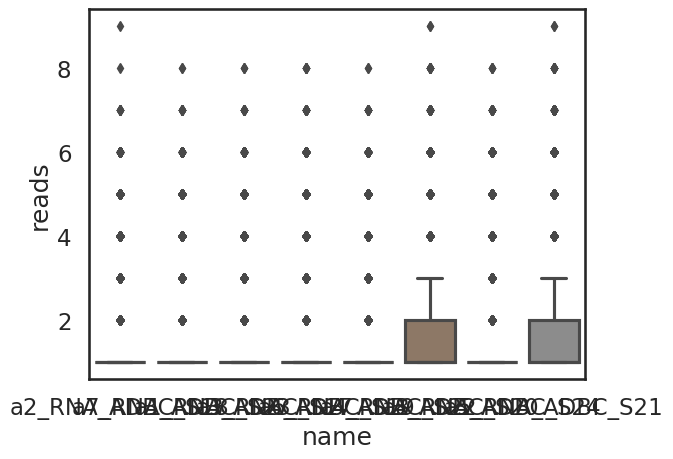

In [16]:
sns.boxplot(data = ADBC_reads_per_umi, x = "name", y = "reads")

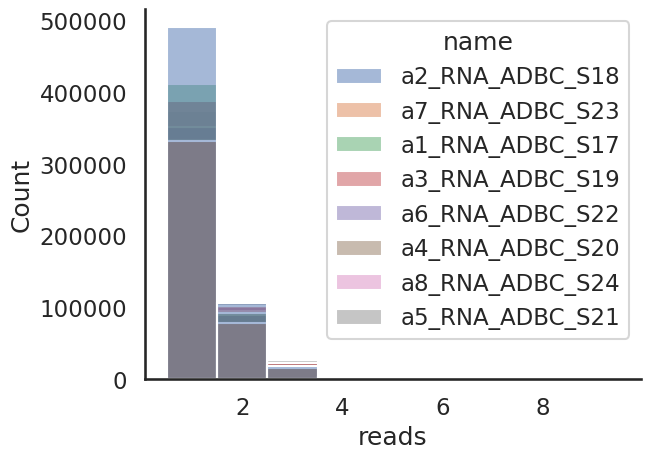

In [14]:
sns.histplot(data = ADBC_reads_per_umi, x = "reads", hue = 'name', discrete = True, log_scale = (False, False))
sns.despine()